# Исследование объявлений о продаже квартир

В распоряжении данные — архив объявлений о продаже квартир в Санкт-Петербурге и соседних населённых пунктов за несколько лет. Проанализирую имеющиеся данные на наличие взаимосвязей между разными параметрами.

Данные содержат основные параметры квартир, такие как:
- airports_nearest — расстояние до ближайшего аэропорта в метрах (м)
- balcony — число балконов
- ceiling_height — высота потолков (м)
- cityCenters_nearest — расстояние до центра города (м)
- days_exposition — сколько дней было размещено объявление (от публикации до снятия)
- first_day_exposition — дата публикации
- floor — этаж
- floors_total — всего этажей в доме
- is_apartment — апартаменты (булев тип)
- kitchen_area — площадь кухни в квадратных метрах (м²)
- last_price — цена на момент снятия с публикации
- living_area — жилая площадь в квадратных метрах(м²)
- locality_name — название населённого пункта
- open_plan — свободная планировка (булев тип)
- parks_around3000 — число парков в радиусе 3 км
- parks_nearest — расстояние до ближайшего парка (м)
- ponds_around3000 — число водоёмов в радиусе 3 км
- ponds_nearest — расстояние до ближайшего водоёма (м)
- rooms — число комнат
- studio — квартира-студия (булев тип)
- total_area — площадь квартиры в квадратных метрах (м²)
- total_images — число фотографий квартиры в объявлении

Задачи:
- Изучить следующие параметры: площадь, цена, число комнат, высота потолков 
- Изучите время продажи квартиры
- Изучить, какие факторы больше всего влияют на стоимость квартиры
- Выделить 10 населённых пунктов с наибольшим числом объявлений
- Изучить предложения квартир и выяснить, какая область входит в центр
- Выделить сегмент квартир в центре и проанализировать какие факторы влияют на стоимость квартиры

Открою файл и посмотрю на имеющиеся данные.

In [127]:
import pandas as pd
import matplotlib.pyplot as plt
data = pd.read_csv ('/Users/kirillshaplyko1/Yandex.Disk.localized/Обучение/Яндекс практикум/Проекты/real_estate_data.csv', sep=None)
data.head()

<ipython-input-127-95a471d54ed5>:3: ParserWarning: Falling back to the 'python' engine because the 'c' engine does not support sep=None with delim_whitespace=False; you can avoid this warning by specifying engine='python'.
  data = pd.read_csv ('/Users/kirillshaplyko1/Yandex.Disk.localized/Обучение/Яндекс практикум/Проекты/real_estate_data.csv', sep=None)


,total_images,last_price,total_area,first_day_exposition,rooms,ceiling_height,floors_total,living_area,floor,is_apartment,...,kitchen_area,balcony,locality_name,airports_nearest,cityCenters_nearest,parks_around3000,parks_nearest,ponds_around3000,ponds_nearest,days_exposition
0,20,13000000.0,108.0,2019-03-07T00:00:00,3,2.70,16.0,51.0,8,NaN,...,25.0,NaN,Санкт-Петербург,18863.0,16028.0,1.0,482.0,2.0,755.0,NaN
1,7,3350000.0,40.4,2018-12-04T00:00:00,1,NaN,11.0,18.6,1,NaN,...,11.0,2.0,посёлок Шушары,12817.0,18603.0,0.0,NaN,0.0,NaN,81.0
2,10,5196000.0,56.0,2015-08-20T00:00:00,2,NaN,5.0,34.3,4,NaN,...,8.3,0.0,Санкт-Петербург,21741.0,13933.0,1.0,90.0,2.0,574.0,558.0
3,0,64900000.0,159.0,2015-07-24T00:00:00,3,NaN,14.0,NaN,9,NaN,...,NaN,0.0,Санкт-Петербург,28098.0,6800.0,2.0,84.0,3.0,234.0,424.0
4,2,10000000.0,100.0,2018-06-19T00:00:00,2,3.03,14.0,32.0,13,NaN,...,41.0,NaN,Санкт-Петербург,31856.0,8098.0,2.0,112.0,1.0,48.0,121.0


In [128]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 23699 entries, 0 to 23698
Data columns (total 22 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   total_images          23699 non-null  int64  
 1   last_price            23699 non-null  float64
 2   total_area            23699 non-null  float64
 3   first_day_exposition  23699 non-null  object 
 4   rooms                 23699 non-null  int64  
 5   ceiling_height        14504 non-null  float64
 6   floors_total          23613 non-null  float64
 7   living_area           21796 non-null  float64
 8   floor                 23699 non-null  int64  
 9   is_apartment          2775 non-null   object 
 10  studio                23699 non-null  bool   
 11  open_plan             23699 non-null  bool   
 12  kitchen_area          21421 non-null  float64
 13  balcony               12180 non-null  float64
 14  locality_name         23650 non-null  object 
 15  airports_nearest   

### Вывод
Данные были в формате csv - одной колонке с разделителем '\'. 
- first_day_exposition данные отображаются как объекты, нужно перевести в дату.
- ceiling_height - есть пропуски, высота потолков есть в каждой квартире. Нужно проанализировать чем заполнить пропуски.
- floors_total - аналогично.
- living_area - аналогично.
- is_apartment - скорее всего отмечено 'да' если аппартаменты, следовательно если пропуск - не аппартаменты.
- kitchen_area - аналогично, заполнить пропуски.
- balcony - скорее всего отмечено 'да' если есть балкон, следовательно если пропуск - нет балкона.
- locality_name - название населенного пункта должно быть везде. Если значение не стоит, то удаляем его - по другим косвенным параметрам никак не определить. Таких значений немного.

Остальные данные не обязательные к заполнению - они показывают наличие или отсутствие рядом инфраструктуры/объектов.

# Предобработка данных

**1. Дата публикации**

In [129]:
data['first_day_exposition']=pd.to_datetime(data['first_day_exposition'], format='%Y-%m-%dT%H:%M:%S')
data.head(2)

,total_images,last_price,total_area,first_day_exposition,rooms,ceiling_height,floors_total,living_area,floor,is_apartment,...,kitchen_area,balcony,locality_name,airports_nearest,cityCenters_nearest,parks_around3000,parks_nearest,ponds_around3000,ponds_nearest,days_exposition
0,20,13000000.0,108.0,2019-03-07,3,2.7,16.0,51.0,8,NaN,...,25.0,NaN,Санкт-Петербург,18863.0,16028.0,1.0,482.0,2.0,755.0,NaN
1,7,3350000.0,40.4,2018-12-04,1,NaN,11.0,18.6,1,NaN,...,11.0,2.0,посёлок Шушары,12817.0,18603.0,0.0,NaN,0.0,NaN,81.0


Привел столбец в форматы даты.

**2. Высота потолков**

(0.0, 5.0)

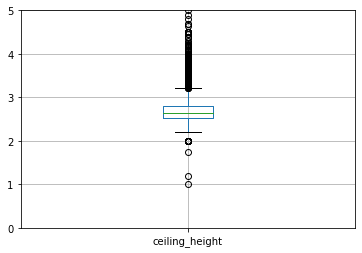

In [130]:
data.boxplot('ceiling_height') #построил диаграмму размаха, чтобы понять примерный разброс величин
plt.ylim(0,5)

In [131]:
data.describe() #посмотрел информацию - минимальное значение 1, максимальное 100

,total_images,last_price,total_area,rooms,ceiling_height,floors_total,living_area,floor,kitchen_area,balcony,airports_nearest,cityCenters_nearest,parks_around3000,parks_nearest,ponds_around3000,ponds_nearest,days_exposition
count,23699.000000,2.369900e+04,23699.000000,23699.000000,14504.000000,23613.000000,21796.000000,23699.000000,21421.000000,12180.000000,18157.000000,18180.000000,18181.000000,8079.000000,18181.000000,9110.000000,20518.000000
mean,9.858475,6.541549e+06,60.348651,2.070636,2.771499,10.673824,34.457852,5.892358,10.569807,1.150082,28793.672193,14191.277833,0.611408,490.804555,0.770255,517.980900,180.888634
std,5.682529,1.088701e+07,35.654083,1.078405,1.261056,6.597173,22.030445,4.885249,5.905438,1.071300,12630.880622,8608.386210,0.802074,342.317995,0.938346,277.720643,219.727988
min,0.000000,1.219000e+04,12.000000,0.000000,1.000000,1.000000,2.000000,1.000000,1.300000,0.000000,0.000000,181.000000,0.000000,1.000000,0.000000,13.000000,1.000000
25%,6.000000,3.400000e+06,40.000000,1.000000,2.520000,5.000000,18.600000,2.000000,7.000000,0.000000,18585.000000,9238.000000,0.000000,288.000000,0.000000,294.000000,45.000000
50%,9.000000,4.650000e+06,52.000000,2.000000,2.650000,9.000000,30.000000,4.000000,9.100000,1.000000,26726.000000,13098.500000,0.000000,455.000000,1.000000,502.000000,95.000000
75%,14.000000,6.800000e+06,69.900000,3.000000,2.800000,16.000000,42.300000,8.000000,12.000000,2.000000,37273.000000,16293.000000,1.000000,612.000000,1.000000,729.000000,232.000000
max,50.000000,7.630000e+08,900.000000,19.000000,100.000000,60.000000,409.700000,33.000000,112.000000,5.000000,84869.000000,65968.000000,3.000000,3190.000000,3.000000,1344.000000,1580.000000


In [132]:
print(len(data.query('ceiling_height > 4'))) #75 позиций с потолками выше 4 метров
print(len(data.query('ceiling_height < 2.5'))) #73 позиций с потолками ниже 2.5 метров

75
73


In [133]:
median_height = data.query('ceiling_height <4 | ceiling_height >2.5')['ceiling_height'].median() 
#2.65м медианное значение, без учета аномальных
data['ceiling_height'] = data['ceiling_height'].fillna(median_height) 
#заполнил пропуски медианным значением
data = data.query('ceiling_height <=4 & ceiling_height >=2.5') 
#оставляем в таблице только нормальные значения
data['ceiling_height'].describe()

count    23551.000000
mean         2.694379
std          0.203935
min          2.500000
25%          2.600000
50%          2.650000
75%          2.700000
max          4.000000
Name: ceiling_height, dtype: float64

Высота потолков выше 4х метров выглядить неправдоподобно, таких 75 записей. 73 записи с высотой ниже 2.5 метров.
Посчитал медианное значение без учета аномальных. Заполнил пропуски медианным значением. Убрал аномальные.

**3. Площадь квартиры - жилая и общая**

In [134]:
data['living_area'].describe()

count    21660.000000
mean        34.365432
std         21.674077
min          2.000000
25%         18.600000
50%         30.000000
75%         42.300000
max        409.700000
Name: living_area, dtype: float64

In [135]:
data['total_area'].describe()

count    23551.000000
mean        60.217095
std         35.079488
min         12.000000
25%         40.000000
50%         52.000000
75%         69.775000
max        900.000000
Name: total_area, dtype: float64

In [136]:
median_proportion_living_area=(data['living_area']/data['total_area']).median() 
#среднее соотношение жилой к общей площади

data['living_area']=data['living_area'].fillna(data['total_area']*median_proportion_living_area)
#заполнил пропуски в жилой площади % от общей

total_living=data['total_area']-data['living_area']
total_living[total_living < 0] #проверил, что жилая площадь не больше общей площади
len(data.query('living_area <10')) #31 позиция жилой площади меньше 10 кв м

31

In [137]:
data = data.query('living_area >=10')
len(data['living_area'])

23520

- посмотрел информацию о 2-х столбцах - жилая площадь и общая площадь, расчитал среднюю пропорцию - отношение жилой площади к общей
- заполнил пропуски в жилой площади с помощью этой пропорции
- проверил, что общая площадь больше жилой площади
- убрал значения с жилой площадью меньше 10 кв м

**4. Этажи**

In [138]:
data['floors_total'].describe()

count    23434.000000
mean        10.692157
std          6.595944
min          1.000000
25%          5.000000
50%          9.000000
75%         16.000000
max         60.000000
Name: floors_total, dtype: float64

In [139]:
data['floor'].describe()

count    23520.000000
mean         5.898980
std          4.888188
min          1.000000
25%          2.000000
50%          4.000000
75%          8.000000
max         33.000000
Name: floor, dtype: float64

In [140]:
data['floors_total'] = data['floors_total'].fillna(data['floor']) #заполнил пропуски медианой
data['floors_total'].describe()

count    23520.000000
mean        10.689711
std          6.594573
min          1.000000
25%          5.000000
50%          9.000000
75%         16.000000
max         60.000000
Name: floors_total, dtype: float64

In [141]:
data['last_floor'] = data['floors_total']-data['floor']
data.query('last_floor<0') #проверил, что жилой этаж не больше чем общая этажность дома

,total_images,last_price,total_area,first_day_exposition,rooms,ceiling_height,floors_total,living_area,floor,is_apartment,...,balcony,locality_name,airports_nearest,cityCenters_nearest,parks_around3000,parks_nearest,ponds_around3000,ponds_nearest,days_exposition,last_floor


- заполнил пропуски в этажности дома этажом квартиры
- проверил, что этаж квартиры меньше, чем этажность дома

**5. Площадь кухни**

In [142]:
data['kitchen_area'].describe()

count    21271.000000
mean        10.554430
std          5.869074
min          1.300000
25%          7.000000
50%          9.100000
75%         12.000000
max        112.000000
Name: kitchen_area, dtype: float64

In [143]:
data['kitchen_area']=data['kitchen_area'].fillna(data['kitchen_area'].median())
data['kitchen_area'].describe()

count    23520.000000
mean        10.415356
std          5.597774
min          1.300000
25%          7.400000
50%          9.100000
75%         11.400000
max        112.000000
Name: kitchen_area, dtype: float64

Заполнил пропуски медианным значением

### Добавление параметров в таблицу
Для удобства дальнейшего анализа добавим некоторые значения в имеющиеся данные:
- цена квадратного метра
- соотношение площадей

**1. Цена 1 квадратного метра**

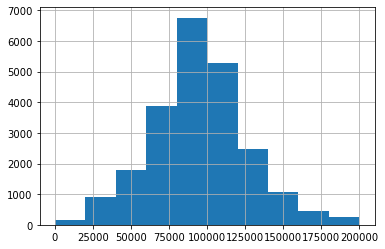

In [144]:
data['Price_per_sqm']=data['last_price']/data['total_area']
data['Price_per_sqm'].hist(range=(0,200000))

**2. Соотношения площадей**

In [145]:
data['living_total_area']=data['living_area']/data['total_area']
data['kitchen_total_area']=data['kitchen_area']/data['total_area']
data.head()

,total_images,last_price,total_area,first_day_exposition,rooms,ceiling_height,floors_total,living_area,floor,is_apartment,...,cityCenters_nearest,parks_around3000,parks_nearest,ponds_around3000,ponds_nearest,days_exposition,last_floor,Price_per_sqm,living_total_area,kitchen_total_area
0,20,13000000.0,108.0,2019-03-07,3,2.70,16.0,51.000000,8,NaN,...,16028.0,1.0,482.0,2.0,755.0,NaN,8.0,120370.370370,0.472222,0.231481
1,7,3350000.0,40.4,2018-12-04,1,2.65,11.0,18.600000,1,NaN,...,18603.0,0.0,NaN,0.0,NaN,81.0,10.0,82920.792079,0.460396,0.272277
2,10,5196000.0,56.0,2015-08-20,2,2.65,5.0,34.300000,4,NaN,...,13933.0,1.0,90.0,2.0,574.0,558.0,1.0,92785.714286,0.612500,0.148214
3,0,64900000.0,159.0,2015-07-24,3,2.65,14.0,90.230061,9,NaN,...,6800.0,2.0,84.0,3.0,234.0,424.0,5.0,408176.100629,0.567485,0.057233
4,2,10000000.0,100.0,2018-06-19,2,3.03,14.0,32.000000,13,NaN,...,8098.0,2.0,112.0,1.0,48.0,121.0,1.0,100000.000000,0.320000,0.410000


### Исследовательский анализ данных

**1. Изучение параметров - площадь, цена, число комнат, высота потолков**

,last_price,total_area,rooms,ceiling_height
last_price,1.000000,0.646839,0.359276,0.274316
total_area,0.646839,1.000000,0.761408,0.386742
rooms,0.359276,0.761408,1.000000,0.249311
ceiling_height,0.274316,0.386742,0.249311,1.000000


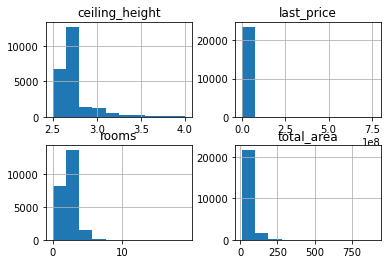

In [146]:
parametrs_research = data.iloc[:,[1,2,4,5]]
parametrs_research.head()
parametrs_research.hist()
parametrs_research.describe()
parametrs_research.corr()

Вывод: цена коррелирует с общей площадью квартиры, которая коррелирует с количеством комнат, что довольно логично. 
А вот с высотой потолков взаимосвязь не такая большая. 

**2. Время продажи**

count    20366.000000
mean       180.786752
std        219.726681
min          1.000000
25%         45.000000
50%         95.000000
75%        231.000000
max       1580.000000
Name: days_exposition, dtype: float64

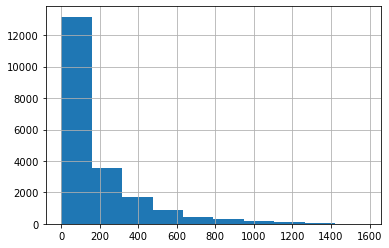

In [147]:
data['days_exposition'].hist()
data['days_exposition'].describe()

Вывод: среднее время продажи квартиры составляет 95 дней. 
Долгая продажа квартиры составляет больше 600 дней - там значения редки.
Быстрая продажа квартиры - за 45 дней. Это как раз первый квартиль

**3. Редкие значения**

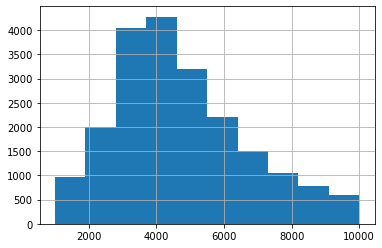

In [148]:
#Для более точного результата, посмотрим распределение цены.
data['last_price_000']=data['last_price']/1000
data['last_price_000'].describe()
data['last_price_000'].hist(range=(1000,10000)) 

In [149]:
len(data.query('last_price_000 >1000 & last_price_000 < 10000')) 
#убрал аномальные значения - квартиры стоимость ниже 1 млн и выше 10 млн
price_research = data.query('last_price_000 >1000 & last_price_000 < 10000')
price_research.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 20525 entries, 1 to 23698
Data columns (total 27 columns):
 #   Column                Non-Null Count  Dtype         
---  ------                --------------  -----         
 0   total_images          20525 non-null  int64         
 1   last_price            20525 non-null  float64       
 2   total_area            20525 non-null  float64       
 3   first_day_exposition  20525 non-null  datetime64[ns]
 4   rooms                 20525 non-null  int64         
 5   ceiling_height        20525 non-null  float64       
 6   floors_total          20525 non-null  float64       
 7   living_area           20525 non-null  float64       
 8   floor                 20525 non-null  int64         
 9   is_apartment          2386 non-null   object        
 10  studio                20525 non-null  bool          
 11  open_plan             20525 non-null  bool          
 12  kitchen_area          20525 non-null  float64       
 13  balcony         

**4. Зависимость ли цены от квадратного метра, числа комнат, этажа (первого или последнего), удалённости от центра**

In [150]:
price_research1 = price_research.iloc[:,[26,23,4,16]]
price_research1.corr()
#pd.plotting.scatter_matrix(price_research, figsize=(9, 9))

,last_price_000,Price_per_sqm,rooms,cityCenters_nearest
last_price_000,1.000000,0.575291,0.434370,-0.329909
Price_per_sqm,0.575291,1.000000,-0.294254,-0.385603
rooms,0.434370,-0.294254,1.000000,-0.048724
cityCenters_nearest,-0.329909,-0.385603,-0.048724,1.000000


Вывод: обратная корреляция цены квартиры и расстояния до центра говорит о том, что чем ближе к центру, тем дороже стоит квартира.

**5. Цена и населенный пункт**

In [155]:
locality = price_research_normal.pivot_table(index='locality_name',values='Price_per_sqm',aggfunc=['mean','count'])
locality.columns = ['Цена кв м','Количество объявлений']
locality.sort_values(by='Цена кв м',ascending=False).head(10)
#больше всего объявлений о продаже квартиры было зафиксировано в городе Санкт-Петербург

,Цена кв м,Количество объявлений
locality_name,,
посёлок Лисий Нос,121616.221359,2
Санкт-Петербург,104204.460698,12962
Пушкин,99896.771588,327
Кудрово,99702.682447,170
Сестрорецк,98587.552928,164
деревня Мистолово,98549.976709,11
Зеленогорск,97894.210026,21
посёлок Левашово,96997.690531,1
Мурино,92722.708914,34


In [152]:
locality_by_total_area = price_research_normal.pivot_table(index='locality_name',values=['Price_per_sqm'],aggfunc=['mean','count'])
locality_by_total_area.columns = ['Цена кв м','Количество объявлений']
locality_by_total_area.sort_values(by='Цена кв м', ascending=True).head(10)

,Цена кв м,Количество объявлений
locality_name,,
поселок Житково,15648.286140,1
посёлок Сумино,19572.953737,1
поселок городского типа Никольский,19577.327649,3
Бокситогорск,19600.140713,2
поселок Оредеж,19877.675841,1
деревня Кисельня,20909.090909,1
посёлок Плоское,20912.547529,1
Сланцы,20962.983017,25
поселок Торковичи,21075.225049,3


Вывод: самые дешевые квартиры в поселке Житково

**6. Квартиры в СПБ**

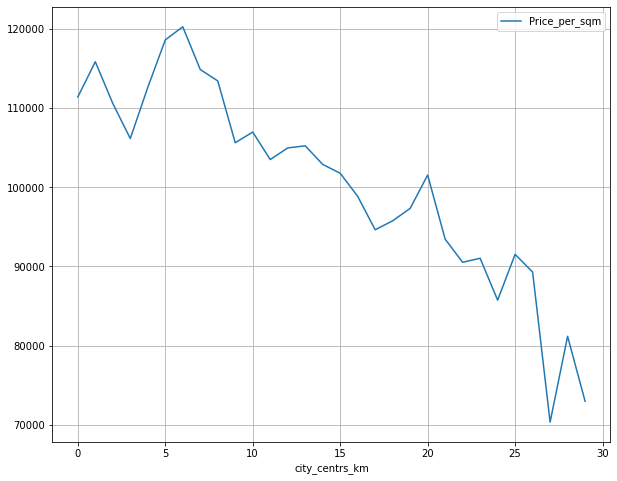

In [159]:
spb = price_research_normal.query('locality_name == "Санкт-Петербург"')
spb.describe() #5393 - это last_price mean
spb = spb.dropna(subset=['cityCenters_nearest'])
spb['cityCenters_nearest'].isna().sum()
spb.describe() #после удаления пустых строк по столбцу 'cityCenters_nearest' среднее стало 5392, так что безболезненно почистили пустые значения
spb['city_centrs_km']=(round(spb['cityCenters_nearest']/1000,0))
spb['city_centrs_km'] = spb['city_centrs_km'].astype('int')
#spb.info() #перевел расстояние до центра в километры и преобразовал в целые числа
spb.head()
spb.pivot_table(index='city_centrs_km',values='Price_per_sqm',aggfunc='mean').plot(grid=True,figsize=(10,8))
#построил зависимость средних величин между расстоянием до центра и ценой квадратного метра

Определим центр города расстоянием в 10 км - здесь средняя цена самая высокая 110-120 тысяч за метр

**7. Квартиры в центре СПБ**

In [166]:
spb_centrs=spb[spb['city_centrs_km'] <= 10]
spb_centrs.describe()

,total_images,last_price,total_area,rooms,ceiling_height,floors_total,living_area,floor,kitchen_area,balcony,...,parks_nearest,ponds_around3000,ponds_nearest,days_exposition,last_floor,Price_per_sqm,living_total_area,kitchen_total_area,last_price_000,city_centrs_km
count,3466.000000,3.466000e+03,3466.000000,3466.000000,3466.000000,3466.000000,3466.000000,3466.000000,3466.000000,1522.000000,...,2064.000000,3466.000000,2045.000000,3095.000000,3466.000000,3466.000000,3466.000000,3466.000000,3466.000000,3466.000000
mean,9.471437,6.250714e+06,57.895490,2.079054,2.793468,8.364397,33.879588,4.577900,9.964599,0.809461,...,489.912306,0.990479,489.167726,197.434572,3.786497,112140.348497,0.575940,0.185002,6250.713971,6.612522
std,5.482484,1.912678e+06,20.547912,0.938566,0.273063,5.300406,14.855321,3.628788,4.056488,0.946548,...,362.384158,1.043178,261.917679,238.251781,3.952459,26853.860055,0.103658,0.077735,1912.677510,2.607162
min,0.000000,1.600000e+06,12.000000,0.000000,2.500000,2.000000,10.000000,1.000000,2.000000,0.000000,...,11.000000,0.000000,22.000000,2.000000,0.000000,15345.268542,0.141304,0.060606,1600.000000,0.000000
25%,6.000000,4.700000e+06,43.000000,1.000000,2.650000,5.000000,20.625000,2.000000,7.500000,0.000000,...,288.000000,0.000000,274.000000,45.000000,1.000000,93463.270963,0.517241,0.129903,4700.000000,5.000000
50%,9.000000,6.200000e+06,55.000000,2.000000,2.650000,6.000000,31.467025,4.000000,9.100000,1.000000,...,441.000000,1.000000,471.000000,104.000000,3.000000,107644.728153,0.578125,0.164565,6200.000000,7.000000
75%,13.000000,7.800000e+06,70.800000,3.000000,3.000000,10.000000,43.000000,5.000000,11.300000,1.000000,...,602.000000,2.000000,687.000000,256.000000,5.000000,127721.427034,0.648083,0.225186,7800.000000,9.000000
max,32.000000,9.999870e+06,190.000000,6.000000,4.000000,28.000000,108.000000,26.000000,48.300000,5.000000,...,3190.000000,3.000000,1313.000000,1497.000000,24.000000,312240.000000,0.972222,0.758333,9999.870000,10.000000


In [167]:
spb_centrs_research = spb_centrs.iloc[:,[26,2,4,5,8,27]]
#spb_centrs_research.info()
spb_centrs_research.corr()

,last_price_000,total_area,rooms,ceiling_height,floor,city_centrs_km
last_price_000,1.000000,0.724468,0.495723,0.351308,0.023731,-0.389025
total_area,0.724468,1.000000,0.801882,0.335669,-0.108610,-0.334300
rooms,0.495723,0.801882,1.000000,0.231984,-0.200855,-0.239754
ceiling_height,0.351308,0.335669,0.231984,1.000000,-0.169276,-0.371430
floor,0.023731,-0.108610,-0.200855,-0.169276,1.000000,0.263473
city_centrs_km,-0.389025,-0.334300,-0.239754,-0.371430,0.263473,1.000000


array([[<matplotlib.axes._subplots.AxesSubplot object at 0x7fb8fd1e8a90>,
      dtype=object)

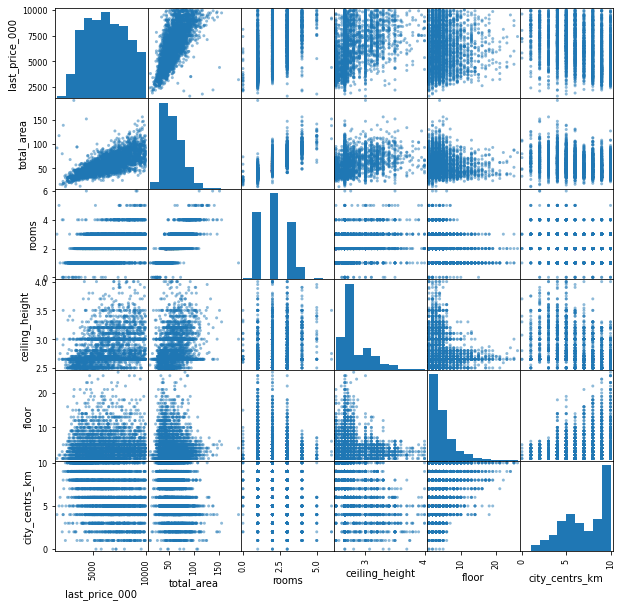

In [168]:
pd.plotting.scatter_matrix(spb_centrs_research,figsize=(10,10))

Цена квартиры в центре Санкт-Петербурга зависит от следующих факторов:
* сильная зависимость от площади квартиры
* площадь квартиры в свою очередь имеет прямую зависимость с количеством комнат, что логично
* цена квартиры падает при отдалении от центра
* в центре города средняя высота потолков немного выше

### Общий вывод

* Среднее время продажи квартиры составляет 95 дней. 
Долгая продажа квартиры составляет больше 600 дней. Быстрая продажа квартиры - за 45 дней. Это как раз первый квартиль
* Цена квартиры повышается с увеличением общей площади квартиры, которая коррелирует с количеством комнат, что довольно логично. 
* Самая дешевая цена квадратного метра встречается в поселках - есть пара объявления по цене до 20 тысяч рублей за метр
* Самое большое количество объявлений в Санкт-Петербурге.
* Самые высокие показатели за квадратный метр в Санкт-Петербурге находятся в районе 10 км от центра - цена за 1 кв метр колеблется в районе 110-120 тысяч рублей.
* По всем объявлениям цена не коррелирует с высотой потолков. А вот квартиры в центре Санкт-Петербурга имеют взаимосвязь цены и высоты потолков - ближе к центру потолки выше и цена соотвественно тоже. 
* Чем ближе к центру, тем выше стоимость квартиры. 
